In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

Using CNTK backend


In [2]:
np.random.seed(42)

In [3]:
file = open('DATA/Stored/storedData_MNIST_X2.npz', 'rb')
DATA = np.load(file)
x_train, y_train = DATA['x_train'], DATA['y_train']
file.close()
print('Total {} samples'.format(len(x_train)))

Total 140000 samples


In [4]:
# Преобразование размерности изображений
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Нормализация данных
x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train, 10)

In [5]:
# Разделение выборки на обучающую и валидационную
valSplit = 0.05
maxSplit = int(len(x_train) // (1/valSplit))
valXArr = np.random.choice(len(x_train), maxSplit, replace=False)

x_val = np.array([x_train[i] for i in valXArr])
y_val = np.array([y_train[i] for i in valXArr])
x_train = np.array([x_train[i] for i in range(len(x_train)) if i not in valXArr])
y_train = np.array([y_train[i] for i in range(len(y_train)) if i not in valXArr])

print('{} train samples\n{} validation samples'.format(len(x_train), len(x_val)))

133000 train samples
7000 validation samples


In [6]:
model = Sequential()

model.add(Conv2D(75, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(100, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 75)        1950      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 75)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 100)         187600    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 100)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
__________

In [7]:
early_stopping_callback = EarlyStopping(monitor='val_acc', patience=5)

In [8]:
history = model.fit(x_train, y_train,
                    batch_size = 128,
                    epochs = 100,
                    verbose = 2,
                    validation_data = (x_val, y_val),
                    callbacks=[early_stopping_callback])

Train on 133000 samples, validate on 7000 samples
Epoch 1/100
 - 174s - loss: 1.6070 - acc: 0.4652 - val_loss: 0.8898 - val_acc: 0.7234
Epoch 2/100
 - 178s - loss: 0.7706 - acc: 0.7530 - val_loss: 0.4884 - val_acc: 0.8513
Epoch 3/100
 - 174s - loss: 0.5252 - acc: 0.8340 - val_loss: 0.3485 - val_acc: 0.8976
Epoch 4/100
 - 176s - loss: 0.4171 - acc: 0.8701 - val_loss: 0.2813 - val_acc: 0.9164
Epoch 5/100
 - 172s - loss: 0.3536 - acc: 0.8895 - val_loss: 0.2573 - val_acc: 0.9199
Epoch 6/100
 - 166s - loss: 0.3107 - acc: 0.9033 - val_loss: 0.2302 - val_acc: 0.9289
Epoch 7/100
 - 165s - loss: 0.2790 - acc: 0.9129 - val_loss: 0.1983 - val_acc: 0.9387
Epoch 8/100
 - 166s - loss: 0.2549 - acc: 0.9220 - val_loss: 0.1830 - val_acc: 0.9440
Epoch 9/100
 - 165s - loss: 0.2363 - acc: 0.9272 - val_loss: 0.2272 - val_acc: 0.9279
Epoch 10/100
 - 164s - loss: 0.2210 - acc: 0.9325 - val_loss: 0.2294 - val_acc: 0.9247
Epoch 11/100
 - 165s - loss: 0.2079 - acc: 0.9357 - val_loss: 0.1515 - val_acc: 0.9540
Ep

Обучение остановлено на 71 эпохе
Точность - 0.9841428571428571


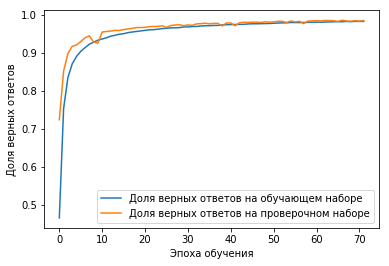

In [9]:
if (early_stopping_callback.stopped_epoch != 0):
    print("Обучение остановлено на", early_stopping_callback.stopped_epoch,"эпохе")
print("Точность -", model.evaluate(x_val, y_val, verbose = 0)[1])

plt.plot(history.history['acc'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [10]:
# Сохраняем модель
model_json = model.to_json()
json_file = open("Models/mnist_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("Models/mnist_model.h5")